# Desafio de Estatística com Python - Frequências e Medidas

**Aluna: Isabella Stersa de Oliveira**

**Considerando a base de dados de enem_2023.json responda as questões abaixo (os dados são fictícios).** 

Você é uma pesquisadora de um cursinho para estudantes que querem ingressar na universidade em 2025. Seu objetivo é retirar informações da base de dados do enem do ano anterior para alinhar melhor as estratégias do cursinho para cada estudante. 

O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o gênero das pessoas que fizeram a prova. No dado existe a representação de 1000 pessoas, sendo cada uma delas uma linha.

In [1]:
### Importação de bibliotecas

### Bibliotecas base
import pandas as pd
import numpy as np
### Bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
### Bibliotecas para estatística
import scipy.stats as stat
### Bibliotecas para importar datasets

In [2]:
# Importando dados
df_enem = pd.read_json('enem_2023.json')

In [3]:
df_enem.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


1. Qual das disciplinas tem a maior amplitude de nota?

In [8]:
colunas = ['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']
amplitudes = {}

for c in colunas:
    max_valor = df_enem[c].max()
    min_valor = df_enem[c].min()
    amplitude = max_valor - min_valor
    amplitudes[c] = amplitude

maior_amp = max(amplitudes.values())
materia_maior_amp = max(amplitudes, key=amplitudes.get)

print(f'\nMaior Amplitude: {maior_amp:.2f} ({materia_maior_amp})')


Maior Amplitude: 729.16 (Redação)


2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)

In [29]:
# Média
df_enem[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].dropna().mean()

Linguagens              517.467162
Ciências humanas        528.351454
Ciências da natureza    502.142101
Matemática              537.172480
Redação                 641.193123
dtype: float64

In [30]:
# Mediana
df_enem[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].dropna().median()

Linguagens              517.128831
Ciências humanas        528.503263
Ciências da natureza    502.935209
Matemática              532.961486
Redação                 639.602691
dtype: float64

3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:
a. Redação - 2
b. Matemática e suas Tecnologias - 4
c. Linguagens, Códigos e suas Tecnologias - 2
d. Ciências Humanas e suas Tecnologias - 1
e. Ciências da Natureza e suas Tecnologias - 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?

In [16]:
# Criação da coluna de notas de Computação UFPE conforme a regra dos pesos
df_enem['Computação UFPE'] = (
    2 * df_enem['Redação'] +
    4 * df_enem['Matemática'] +
    2 * df_enem['Linguagens'] +
    df_enem['Ciências humanas'] +
    df_enem['Ciências da natureza']
) / 10

# Top 500
top_500_computacao = df_enem['Computação UFPE'].nlargest(500)

print(f'Média: {top_500_computacao.mean()}')
print(f'Desvio padrão: {top_500_computacao.std()}')

Média: 557.2896772018769
Desvio padrão: 40.435866299464266


4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

In [17]:
# Top 40
top_40_computacao = df_enem['Computação UFPE'].nlargest(40)

print(f'Média: {top_40_computacao.mean()}')
print(f'Variância: {top_40_computacao.var()}')

Média: 636.6827415075188
Variância: 295.7675036004101


5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [18]:
Q3_matematica = df_enem['Matemática'].quantile(0.75)
Q3_linguagens = df_enem['Linguagens'].quantile(0.75)

teto_q3_matematica = np.ceil(Q3_matematica)
teto_q3_linguagens = np.ceil(Q3_linguagens)

print(f"Teto do terceiro quartil para Matemática: {teto_q3_matematica}")
print(f"Teto do terceiro quartil para Linguagens: {teto_q3_linguagens}")

Teto do terceiro quartil para Matemática: 593.0
Teto do terceiro quartil para Linguagens: 572.0


6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?

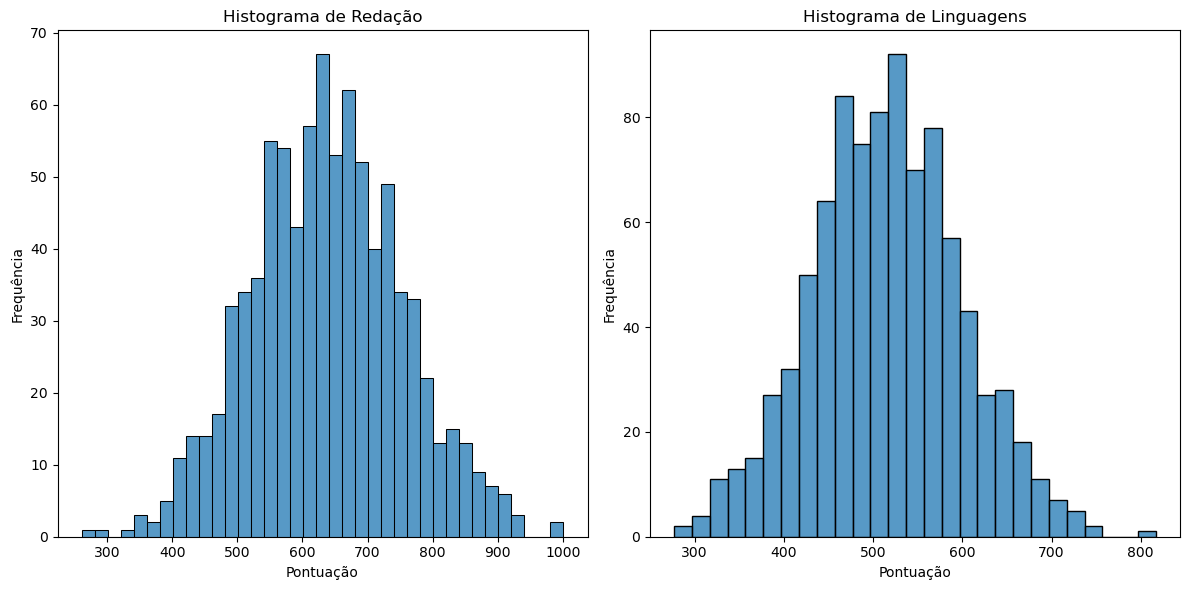

In [22]:
intervalos_redacao = np.arange(df_enem['Redação'].min() - 10, df_enem['Redação'].max() + 20, 20)
intervalos_linguagens = np.arange(df_enem['Linguagens'].min() - 10, df_enem['Linguagens'].max() + 20, 20)

plt.figure(figsize=(12, 6))
# Histograma de Redação
plt.subplot(1, 2, 1)
sns.histplot(df_enem['Redação'], bins=intervalos_redacao, kde=False)
plt.title('Histograma de Redação')
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
# Histograma de Linguagens
plt.subplot(1, 2, 2)
sns.histplot(df_enem['Linguagens'], bins=intervalos_linguagens, kde=False)
plt.title('Histograma de Linguagens')
plt.xlabel('Pontuação')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

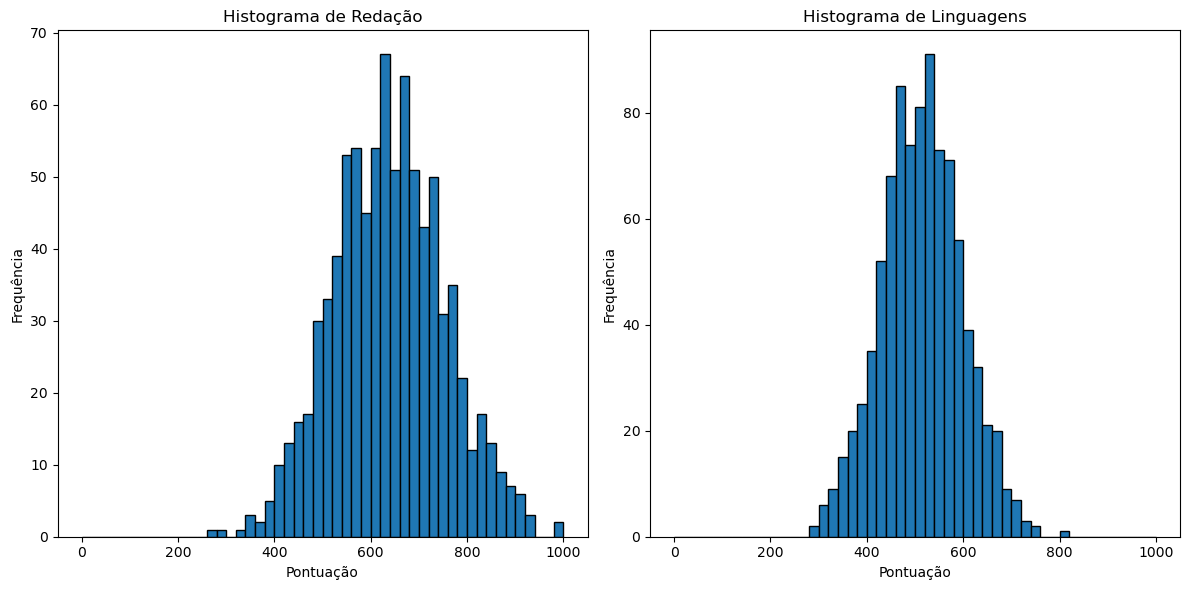

In [23]:
plt.figure(figsize=(12, 6))
# Histograma de Redação
plt.subplot(1, 2, 1)
plt.hist(df_enem['Redação'], bins=range(0, 1020, 20), range=[0, 1000], edgecolor='black')
plt.title('Histograma de Redação')
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
# Histograma de Linguagens
plt.subplot(1, 2, 2)
plt.hist(df_enem['Linguagens'], bins=range(0, 1020, 20), range=[0, 1000], edgecolor='black')
plt.title('Histograma de Linguagens')
plt.xlabel('Pontuação')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

8. Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.

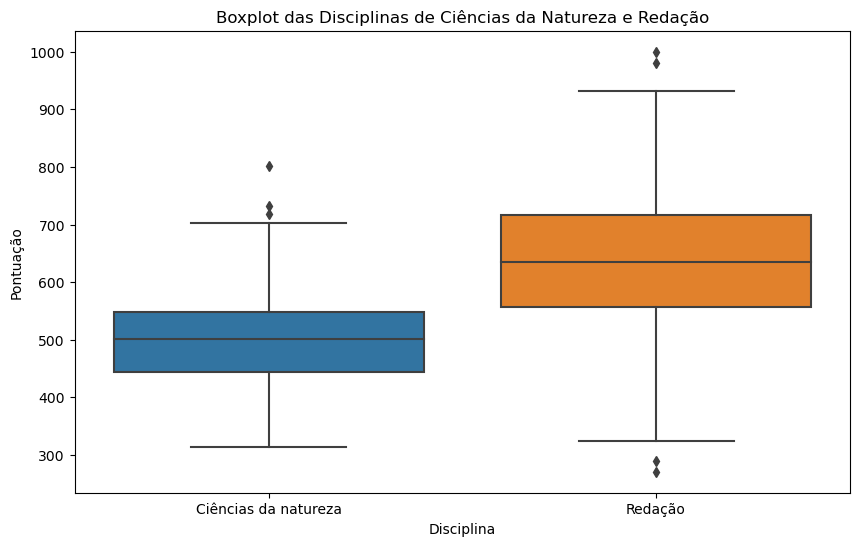

In [24]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_enem[['Ciências da natureza', 'Redação']])
plt.title('Boxplot das Disciplinas de Ciências da Natureza e Redação')
plt.xlabel('Disciplina')
plt.ylabel('Pontuação')
plt.show()

In [34]:
# Ciências da Natureza
Q1_natureza= df_enem['Ciências da natureza'].quantile(0.25)
Q3_natureza = df_enem['Ciências da natureza'].quantile(0.75)
IQR_natureza = Q3_natureza - Q1_natureza

limite_inferior_natureza = Q1_natureza - 1.5 * IQR_natureza
limite_superior_natureza = Q3_natureza + 1.5 * IQR_natureza

outliers_natureza = df_enem[(df_enem['Ciências da natureza'] < limite_inferior_natureza) | (df_enem['Ciências da natureza'] > limite_superior_natureza)]

print(f'Número de Outliers: {outliers_natureza.shape[0]}')
print(outliers_natureza['Ciências da natureza'])

325    802.004568
482    732.502964
483    718.396061
Name: Ciências da natureza, dtype: float64


In [36]:
# Redação
Q1_redacao= df_enem['Redação'].quantile(0.25)
Q3_redacao = df_enem['Redação'].quantile(0.75)
IQR_redacao = Q3_redacao - Q1_redacao

limite_inferior_redacao = Q1_redacao - 1.5 * IQR_redacao
limite_superior_redacao = Q3_redacao + 1.5 * IQR_redacao

outliers_redacao = df_enem[(df_enem['Redação'] < limite_inferior_redacao) | (df_enem['Redação'] > limite_superior_natureza)]

print(f'Número de Outliers: {outliers_redacao.shape[0]}')
print(outliers_redacao['Redação'])

Número de Outliers: 239
1      741.825256
4      744.375048
9      270.839965
10     785.132708
11     758.966704
          ...    
965    881.465882
975    722.175347
990    795.671459
996    715.984249
997    798.408655
Name: Redação, Length: 239, dtype: float64


9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)

In [37]:
# Removendo Outliers

def remover_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    return df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

df_sem_outliers = df_enem.copy()
colunas = ['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']

for coluna in colunas:
    df_sem_outliers = remover_outliers(df_sem_outliers, coluna)

In [41]:
# Média Geral
media_original = df_enem[colunas].mean().mean()
media_sem_outliers = df_sem_outliers[colunas].mean().mean()

print(f'Média Original: {media_original}')
print(f'Média sem Outliers: {media_sem_outliers}')

diferenca_perc = ((media_sem_outliers - media_original) / media_original) * 100

print(f"\nDiferença Percentual na Média Geral: {diferenca_perc:.2f}%")


Média Original: 542.9263730172955
Média sem Outliers: 544.3471131842695

Diferença Percentual na Média Geral: 0.26%


10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [44]:
# Calcular a média, mediana e moda de cada disciplina
medias = df_enem[colunas].mean()
medianas = df_enem[colunas].median()
modas = df_enem[colunas].mode().iloc[0] 

print("Médias:\n", medias)
print("\nMedianas:\n", medianas)
print("\nModas:\n", modas)


Médias:
 Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

Medianas:
 Linguagens              515.045250
Ciências humanas        524.519920
Ciências da natureza    500.479263
Matemática              533.247767
Redação                 635.273973
dtype: float64

Modas:
 Linguagens              287.000000
Ciências humanas        289.900000
Ciências da natureza    314.400000
Matemática              319.800000
Redação                 270.839965
Name: 0, dtype: float64


In [ ]:
df_media = df_enem.fillna(medias)
df_mediana = df_enem.fillna(medianas)
df_moda = df_enem.fillna(modas)

media_geral_media = df_media[colunas].mean().mean()
desvio_padrao_media = df_media[colunas].std().mean()

media_geral_mediana = df_mediana[colunas].mean().mean()
desvio_padrao_mediana = df_mediana[colunas].std().mean()

media_geral_moda = df_moda[colunas].mean().mean()
desvio_padrao_moda = df_moda[colunas].std().mean()

print(f"Média Geral após substituição pela Média: {media_geral_media:.2f}, Desvio Padrão: {desvio_padrao_media:.2f}")
print(f"Média Geral após substituição pela Mediana: {media_geral_mediana:.2f}, Desvio Padrão: {desvio_padrao_mediana:.2f}")
print(f"Média Geral após substituição pela Moda: {media_geral_moda:.2f}, Desvio Padrão: {desvio_padrao_moda:.2f}")


In [46]:
# Calcular a diferença percentual na média geral e desvio padrão
diferenca_media_media = abs((media_geral_media - medias.mean()) / medias.mean()) * 100
diferenca_desvio_media = abs((desvio_padrao_media - df_enem[colunas].std().mean()) / df_enem[colunas].std().mean()) * 100

diferenca_media_mediana = abs((media_geral_mediana - medias.mean()) / medias.mean()) * 100
diferenca_desvio_mediana = abs((desvio_padrao_mediana - df_enem[colunas].std().mean()) / df_enem[colunas].std().mean()) * 100

diferenca_media_moda = abs((media_geral_moda - medias.mean()) / medias.mean()) * 100
diferenca_desvio_moda = abs((desvio_padrao_moda - df_enem[colunas].std().mean()) / df_enem[colunas].std().mean()) * 100

print("\nDiferença Percentual na Média Geral:")
print(f"Substituição pela Média: {diferenca_media_media:.2f}%")
print(f"Substituição pela Mediana: {diferenca_media_mediana:.2f}%")
print(f"Substituição pela Moda: {diferenca_media_moda:.2f}%")

print("\nDiferença Percentual no Desvio Padrão:")
print(f"Substituição pela Média: {diferenca_desvio_media:.2f}%")
print(f"Substituição pela Mediana: {diferenca_desvio_mediana:.2f}%")
print(f"Substituição pela Moda: {diferenca_desvio_moda:.2f}%")



Diferença Percentual na Média Geral:
Substituição pela Média: 0.00%
Substituição pela Mediana: 0.02%
Substituição pela Moda: 5.12%

Diferença Percentual no Desvio Padrão:
Substituição pela Média: 5.88%
Substituição pela Mediana: 5.87%
Substituição pela Moda: 28.41%


In [ ]:
# Pelos resultados apresentados acima, a melhor substituição é pela média